# Kalp Krizi Tahmini

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_curve

In [279]:
df = pd.read_csv("heart.csv")

In [281]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Missing Value Problem

In [284]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Herhangi bir kayıp veri yok.

### Categorical and Numerical Feature Analysis

In [288]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [290]:
categorical_list = ['sex', 'cp', 'fbs', 'restecg', 'exng','slp', 'caa', 'thall', 'output' ]
df_categorical = df.loc[:, categorical_list]
df_categorical

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


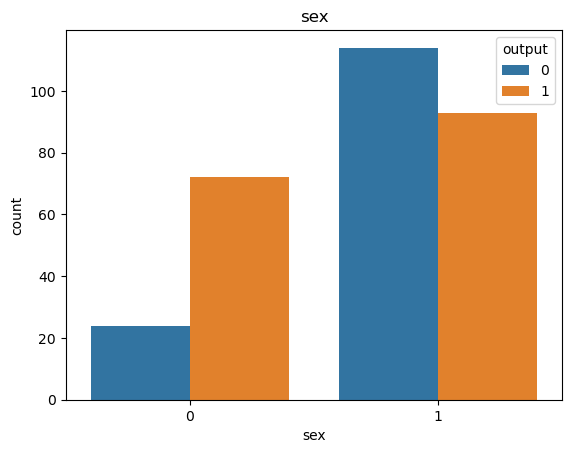

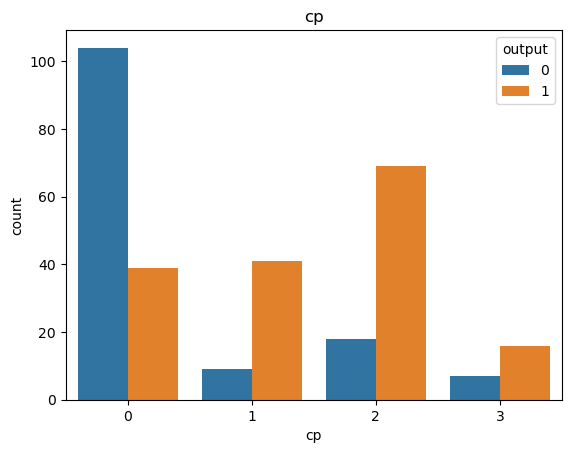

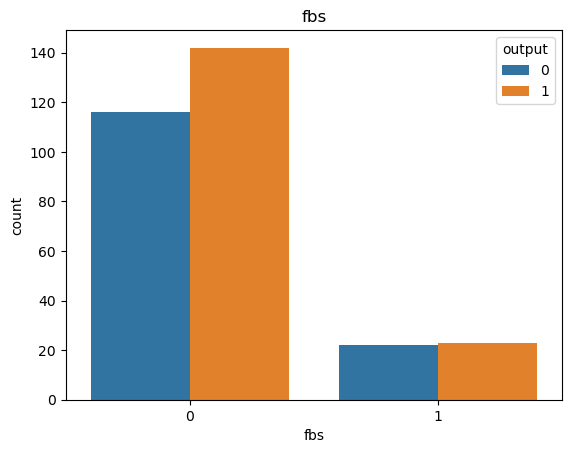

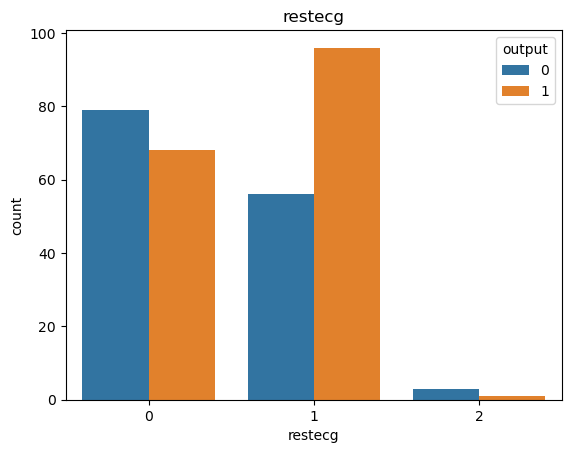

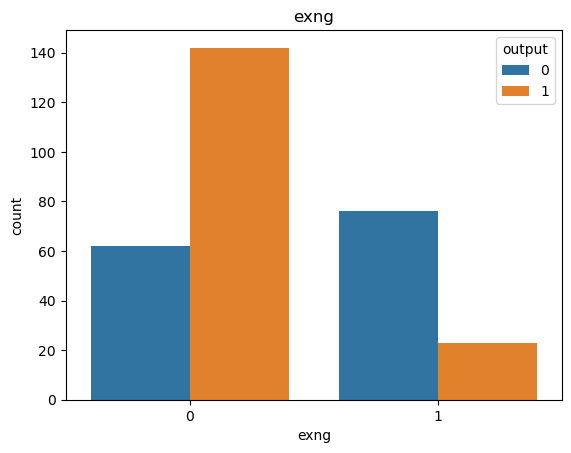

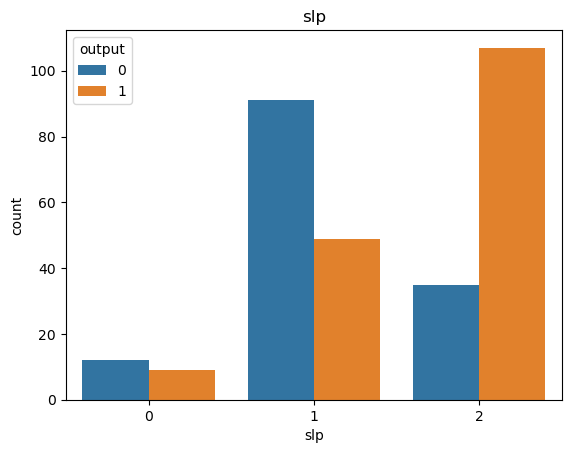

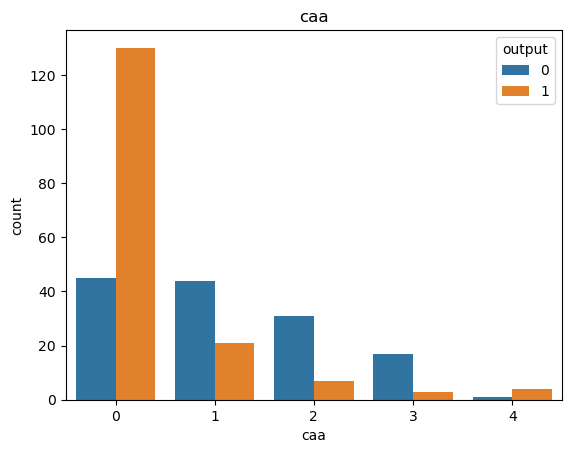

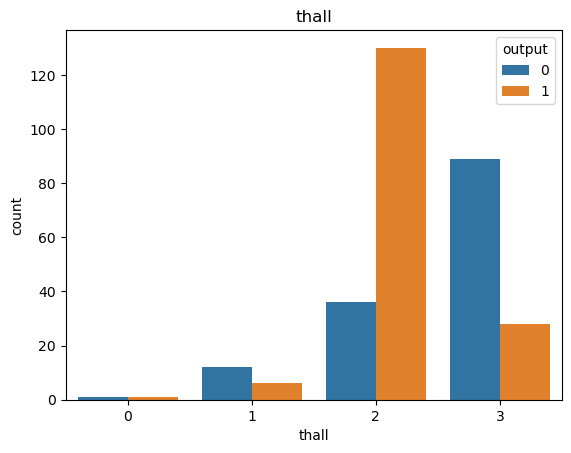

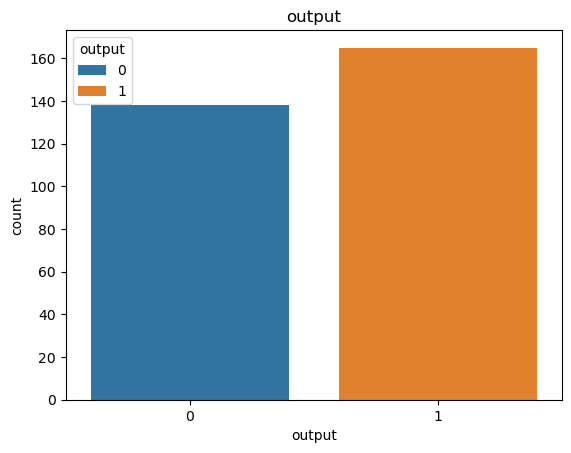

In [292]:
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categorical, hue = "output")
    plt.title(i)

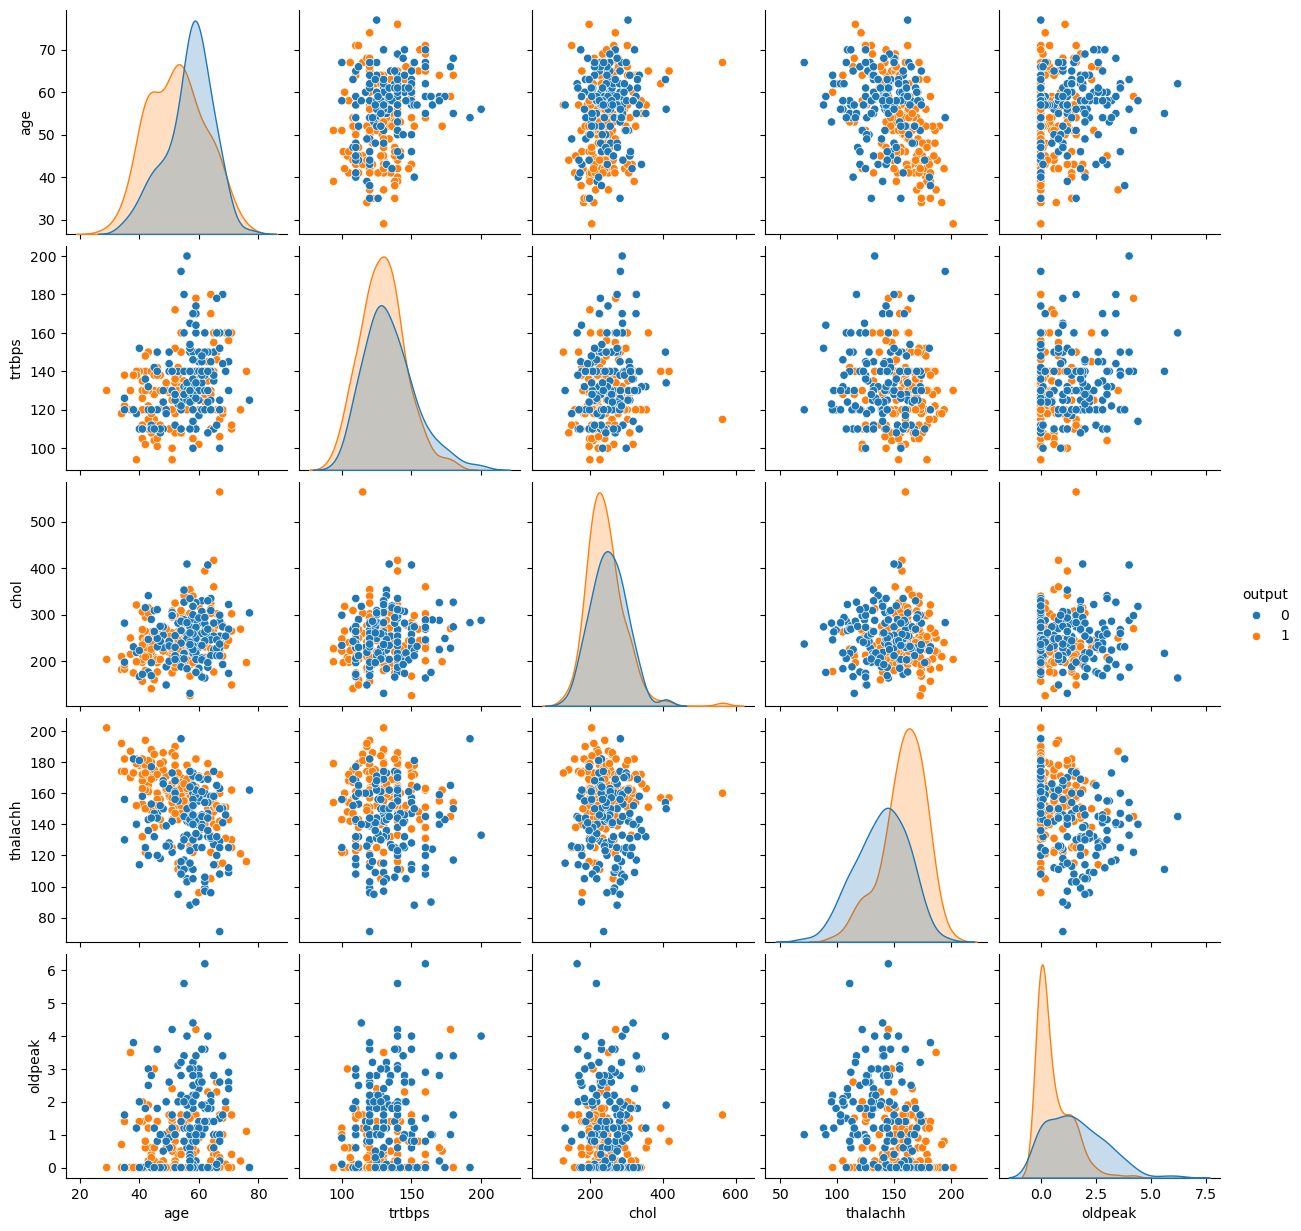

In [293]:
numeric_list = ['age', 'trtbps' , 'chol', 'thalachh', 'oldpeak', 'output']
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind= "kde")
plt.show()

### Kesifsel Veri Analizi ( box - swarm - cat - correlation analysis )

#### Standart Scaler

In [296]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [297]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [298]:
df_dummy = pd.DataFrame(scaled_array, columns=numeric_list[:-1])

In [299]:
df_dummy

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244
...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373
300,1.503641,0.706843,-1.029353,-0.378132,2.036303
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373


In [300]:
df_dummy= pd.concat([df_dummy, df.loc[:,"output"]], axis = 1)

In [302]:
df_dummy

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1
...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0


#### Box Plot

In [304]:
data_melted = pd.melt(df_dummy, id_vars="output" , var_name="features", value_name= "value")

In [305]:
data_melted

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
...,...,...,...
1510,0,oldpeak,-0.724323
1511,0,oldpeak,0.138373
1512,0,oldpeak,2.036303
1513,0,oldpeak,0.138373


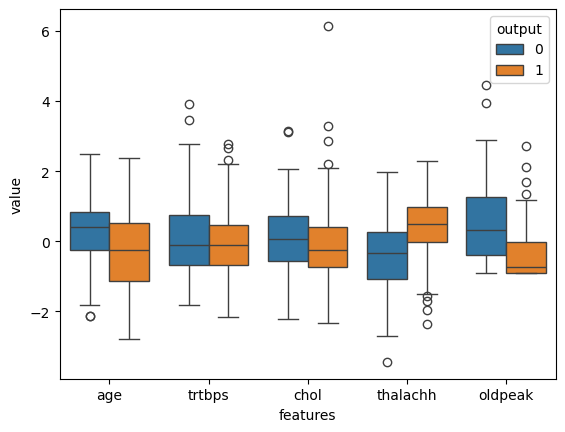

In [306]:
plt.figure()
sns.boxplot(x = "features", y= "value", hue = "output", data = data_melted)
plt.show()

#### Cat Plot

<Figure size 640x480 with 0 Axes>

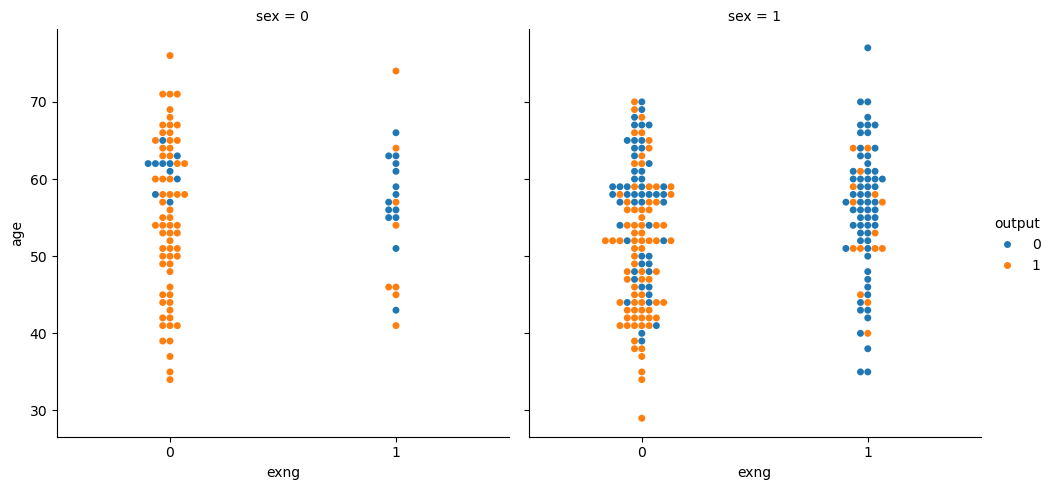

In [310]:
plt.figure()
sns.catplot( x = "exng" , y = "age" , hue = "output" , col = "sex" , kind = "swarm", data=df)
plt.show()

### Korelasyon Analizi

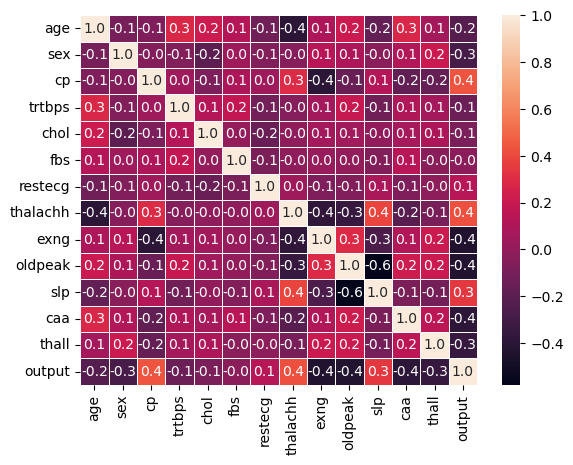

In [312]:
plt.figure()
sns.heatmap(df.corr(), annot=True, fmt=".1f" , linewidths=0.7)
plt.show()

#### Aykırı Değer Tespiti

In [314]:
numeric_list = ['age', 'trtbps' , 'chol', 'thalachh', 'oldpeak', 'output']
df_numeric = df.loc[:, numeric_list]

In [315]:
df_numeric

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


In [316]:
for i in numeric_list:
    #IQR
    Q1 = np.percentile(df.loc[:,i],25)
    Q3 = np.percentile(df.loc[:,i],75)

    IQR = Q3 - Q1
    print(f"{i}oldshape : {df.loc[:,i].shape}")

    #upper bound
    upper = np.where(df.loc[:,i] >= (Q3 + 2.5*IQR))

    #lower bound
    lower = np.where(df.loc[:,i] <= (Q1 - 2.5*IQR))

    try :
        df.drop(upper[0], inplace= True)
    except:
        print("Hata")

    try:
        df.drop(lower[0], inplace=True)
    except :
        print("Hata")

    print(f"New Shape: {df.shape}")


ageoldshape : (303,)
New Shape: (303, 14)
trtbpsoldshape : (303,)
New Shape: (301, 14)
chololdshape : (301,)
New Shape: (300, 14)
thalachholdshape : (300,)
New Shape: (300, 14)
oldpeakoldshape : (300,)
New Shape: (298, 14)
outputoldshape : (298,)
New Shape: (298, 14)


### Modelleme 

In [318]:
df1 = df.copy()

One Hot Encoding : Kategorik değerleri numerik değerlere dönüştürme

In [320]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first= True)

In [321]:
df1

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,0,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,0,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,0,True,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [322]:
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

In [323]:
X

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [324]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [325]:
scaler = StandardScaler()
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])

In [334]:
X[numeric_list[:-1]]

,age,trtbps,chol,thalachh,oldpeak
0,0.965901,0.845093,-0.236684,0.021855,1.122573
1,-1.902555,-0.061886,0.119326,1.639116,2.174545
2,-1.461254,-0.061886,-0.843995,0.983470,0.333595
3,0.193624,-0.666538,-0.173859,1.245729,-0.192391
4,0.303950,-0.666538,2.297269,0.590082,-0.367719
...,...,...,...,...,...
298,0.303950,0.542767,-0.069150,-1.158309,-0.718376
299,-1.019953,-1.271190,0.412510,-0.764921,0.158266
300,1.517527,0.784628,-1.074354,-0.371533,2.086880
301,0.303950,-0.061886,-2.372743,-1.507987,0.158266


In [337]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [392]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

In [340]:
print(f"test accuracy: {accuracy_score(y_test, y_pred)}")

test accuracy: 0.9


Roc Curve

In [349]:
fpr , tpr, treshold = roc_curve(y_test, y_pred_prob[:,1])

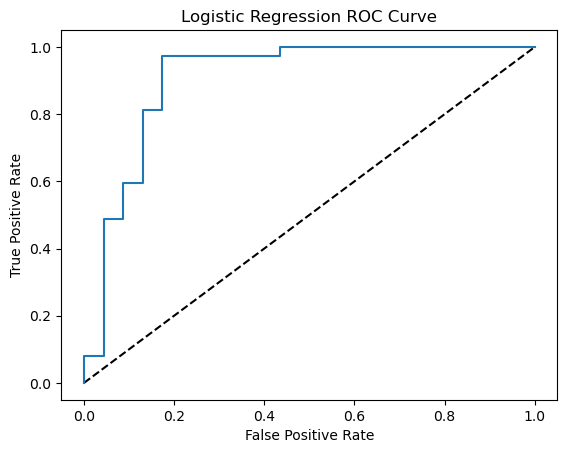

In [356]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()